In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
carprice=pd.read_csv("data.csv")


In [66]:
type(carprice)

pandas.core.frame.DataFrame

In [67]:
carprice.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [68]:
carprice["Make"].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [69]:
df = carprice

In [70]:
carprice

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [71]:
# print(df.apply(lambda x:pd.factorize(x)[0])

In [72]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [73]:
le=preprocessing.LabelEncoder()


In [74]:
df['Make']=le.fit_transform(df['Make'])

In [75]:
df.dropna(inplace=True)

In [76]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,4,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,4,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,4,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,4,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,4,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,4,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,4,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,4,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,4,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [77]:

df['Engine Fuel Type']=le.fit_transform(df['Engine Fuel Type'])

In [78]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [79]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [80]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1 Series M,2011,6,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,4,1 Series,2011,6,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,4,1 Series,2011,6,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,4,1 Series,2011,6,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,4,1 Series,2011,6,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,4,1 Series,2012,6,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,4,1 Series,2012,6,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,4,1 Series,2012,6,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,4,1 Series,2012,6,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,4,1 Series,2013,6,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [81]:
df['Model']=le.fit_transform(df['Model'])

In [82]:
df['Transmission Type']=le.fit_transform(df['Transmission Type'])

In [83]:
df['Driven_Wheels']=le.fit_transform(df['Driven_Wheels'])

In [84]:
df['Market Category']=le.fit_transform(df['Market Category'])

In [85]:
df['Vehicle Size']=le.fit_transform(df['Vehicle Size'])

In [86]:
df['Vehicle Style']=le.fit_transform(df['Vehicle Style'])

In [87]:
df['Year']=le.fit_transform(df['Year'])

In [88]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,21,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,46135
1,4,0,21,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,40650
2,4,0,21,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,36350
3,4,0,21,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,29450
4,4,0,21,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,34500
5,4,0,22,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,31200
6,4,0,22,6,300.0,6.0,3,3,2.0,66,0,6,26,17,3916,44100
7,4,0,22,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,39300
8,4,0,22,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,36900
9,4,0,23,6,230.0,6.0,3,3,2.0,62,0,6,27,18,3916,37200


In [89]:
data2=df.corr('pearson')

In [90]:
abs(data2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,0.019650,0.072013,0.097175,0.244641,0.271241,0.071735,0.037006,0.035730,0.000515,0.100201,0.151170,0.126118,0.169311,0.316756,0.114350
Model,0.019650,1.000000,0.117518,0.011694,0.005805,0.037946,0.104630,0.108015,0.160707,0.221727,0.052456,0.103285,0.083787,0.017479,0.119296,0.025186
Year,0.072013,0.117518,1.000000,0.223699,0.244256,0.046552,0.296359,0.179900,0.182905,0.194360,0.108599,0.037100,0.216441,0.180041,0.118304,0.133684
Engine Fuel Type,0.097175,0.011694,0.223699,1.000000,0.141533,0.091385,0.094828,0.012151,0.019163,0.036931,0.046801,0.182134,0.054397,0.013362,0.060706,0.069377
Engine HP,0.244641,0.005805,0.244256,0.141533,1.000000,0.811390,0.143087,0.023640,0.196042,0.014851,0.182572,0.196905,0.473019,0.512779,0.038012,0.656662
Engine Cylinders,0.271241,0.037946,0.046552,0.091385,0.811390,1.000000,0.128096,0.124095,0.178578,0.011351,0.170356,0.173228,0.603237,0.615459,0.014825,0.589185
Transmission Type,0.071735,0.104630,0.296359,0.094828,0.143087,0.128096,1.000000,0.194463,0.309936,0.170818,0.283638,0.125292,0.050691,0.029427,0.012272,0.140910
Driven_Wheels,0.037006,0.108015,0.179900,0.012151,0.023640,0.124095,0.194463,1.000000,0.308930,0.290155,0.152253,0.103068,0.006329,0.013054,0.014815,0.001563
Number of Doors,0.035730,0.160707,0.182905,0.019163,0.196042,0.178578,0.309936,0.308930,1.000000,0.264123,0.317554,0.171679,0.103413,0.140205,0.040450,0.184699
Market Category,0.000515,0.221727,0.194360,0.036931,0.014851,0.011351,0.170818,0.290155,0.264123,1.000000,0.079693,0.384504,0.125265,0.075341,0.040923,0.057530


In [91]:
x=df['Engine HP']
y=df['MSRP']

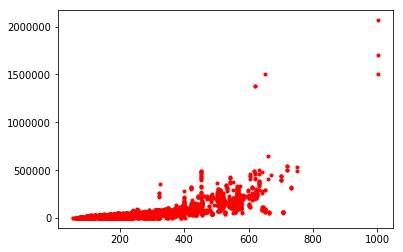

In [92]:
plt.plot(x,y,'r.')
plt.show()

In [93]:
df.corr()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,0.019650,-0.072013,0.097175,-0.244641,-0.271241,0.071735,-0.037006,0.035730,-0.000515,-0.100201,-0.151170,0.126118,0.169311,-0.316756,-0.114350
Model,0.019650,1.000000,0.117518,0.011694,-0.005805,0.037946,-0.104630,-0.108015,0.160707,-0.221727,0.052456,-0.103285,-0.083787,-0.017479,-0.119296,-0.025186
Year,-0.072013,0.117518,1.000000,-0.223699,0.244256,-0.046552,-0.296359,-0.179900,0.182905,-0.194360,0.108599,-0.037100,0.216441,0.180041,0.118304,0.133684
Engine Fuel Type,0.097175,0.011694,-0.223699,1.000000,-0.141533,-0.091385,0.094828,-0.012151,0.019163,-0.036931,-0.046801,-0.182134,-0.054397,-0.013362,-0.060706,-0.069377
Engine HP,-0.244641,-0.005805,0.244256,-0.141533,1.000000,0.811390,-0.143087,0.023640,-0.196042,0.014851,0.182572,0.196905,-0.473019,-0.512779,0.038012,0.656662
Engine Cylinders,-0.271241,0.037946,-0.046552,-0.091385,0.811390,1.000000,-0.128096,0.124095,-0.178578,0.011351,0.170356,0.173228,-0.603237,-0.615459,0.014825,0.589185
Transmission Type,0.071735,-0.104630,-0.296359,0.094828,-0.143087,-0.128096,1.000000,0.194463,-0.309936,0.170818,-0.283638,-0.125292,0.050691,0.029427,-0.012272,-0.140910
Driven_Wheels,-0.037006,-0.108015,-0.179900,-0.012151,0.023640,0.124095,0.194463,1.000000,-0.308930,0.290155,-0.152253,0.103068,0.006329,-0.013054,0.014815,0.001563
Number of Doors,0.035730,0.160707,0.182905,0.019163,-0.196042,-0.178578,-0.309936,-0.308930,1.000000,-0.264123,0.317554,0.171679,0.103413,0.140205,-0.040450,-0.184699
Market Category,-0.000515,-0.221727,-0.194360,-0.036931,0.014851,0.011351,0.170818,0.290155,-0.264123,1.000000,-0.079693,0.384504,0.125265,0.075341,-0.040923,-0.057530


In [94]:
abs(df.corr())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,0.019650,0.072013,0.097175,0.244641,0.271241,0.071735,0.037006,0.035730,0.000515,0.100201,0.151170,0.126118,0.169311,0.316756,0.114350
Model,0.019650,1.000000,0.117518,0.011694,0.005805,0.037946,0.104630,0.108015,0.160707,0.221727,0.052456,0.103285,0.083787,0.017479,0.119296,0.025186
Year,0.072013,0.117518,1.000000,0.223699,0.244256,0.046552,0.296359,0.179900,0.182905,0.194360,0.108599,0.037100,0.216441,0.180041,0.118304,0.133684
Engine Fuel Type,0.097175,0.011694,0.223699,1.000000,0.141533,0.091385,0.094828,0.012151,0.019163,0.036931,0.046801,0.182134,0.054397,0.013362,0.060706,0.069377
Engine HP,0.244641,0.005805,0.244256,0.141533,1.000000,0.811390,0.143087,0.023640,0.196042,0.014851,0.182572,0.196905,0.473019,0.512779,0.038012,0.656662
Engine Cylinders,0.271241,0.037946,0.046552,0.091385,0.811390,1.000000,0.128096,0.124095,0.178578,0.011351,0.170356,0.173228,0.603237,0.615459,0.014825,0.589185
Transmission Type,0.071735,0.104630,0.296359,0.094828,0.143087,0.128096,1.000000,0.194463,0.309936,0.170818,0.283638,0.125292,0.050691,0.029427,0.012272,0.140910
Driven_Wheels,0.037006,0.108015,0.179900,0.012151,0.023640,0.124095,0.194463,1.000000,0.308930,0.290155,0.152253,0.103068,0.006329,0.013054,0.014815,0.001563
Number of Doors,0.035730,0.160707,0.182905,0.019163,0.196042,0.178578,0.309936,0.308930,1.000000,0.264123,0.317554,0.171679,0.103413,0.140205,0.040450,0.184699
Market Category,0.000515,0.221727,0.194360,0.036931,0.014851,0.011351,0.170818,0.290155,0.264123,1.000000,0.079693,0.384504,0.125265,0.075341,0.040923,0.057530


In [95]:
abs(data2['MSRP']).sort_values()

Driven_Wheels        0.001563
Vehicle Size         0.007245
Model                0.025186
Popularity           0.052477
Market Category      0.057530
Vehicle Style        0.068448
Engine Fuel Type     0.069377
Make                 0.114350
Year                 0.133684
Transmission Type    0.140910
Number of Doors      0.184699
highway MPG          0.257585
city mpg             0.268003
Engine Cylinders     0.589185
Engine HP            0.656662
MSRP                 1.000000
Name: MSRP, dtype: float64

In [96]:
x=data2["Engine HP"]
y=data2["MSRP"]
z=data2["Engine Cylinders"]

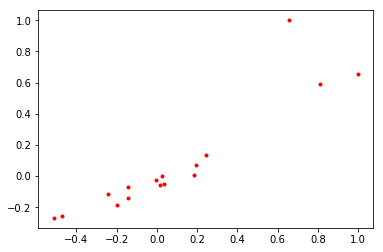

In [97]:
plt.plot(x,y,'r.')
plt.show()

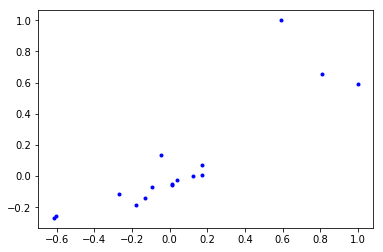

In [98]:
plt.plot(z,y,"b.")
plt.show()

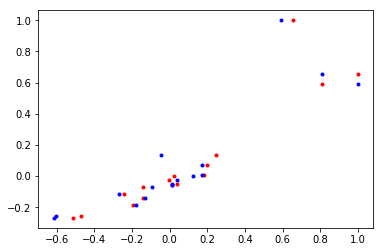

In [99]:
plt.plot(x,y,"r.",z,y,"b.")
plt.show()

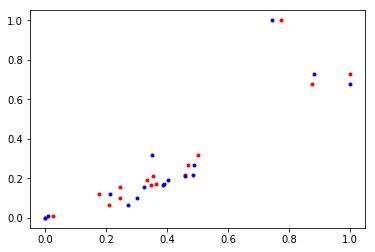

In [100]:
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
z=(z-z.min())/(z.max()-z.min())
plt.plot(x,y,"r.",z,y,"b.")
plt.show()


In [38]:
X=np.array(x)
Y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train.size

12

In [39]:
x_test.size

4

In [40]:

len(x_test)

4

In [41]:
def hypothesis(a,x,b):
    return a*x + b

In [42]:
def error(a,x,b,y):
    e=0
    m=len(x)
    
    for i in range(m):
        e+=np.power(hypothesis(a,x[i],b)-y[i],2)
        
    return (1/(2*m))*e

In [43]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a=0
    grad_b=0
    m=len(x)
    
    for i in range(m):
        grad_a+=(1/m)*(hypothesis(a,x[i],b)-y[i])*x[i]
        grad_b+=(1/m)*(hypothesis(a,x[i],b)-y[i])
        
    a=a - grad_a*learning_rate
    b=b - grad_b*learning_rate
    
    return a,b

In [103]:
def descend(init_a,x,init_b,y,learning_rate,iterations):
    a=init_a
    b=init_b 
    
    for i in range(iterations):
        e=error(a,x,b,y)
    
        if i%1000 == 0:
            print(f"Error:{np.sqrt(e)},a:{a},b:{b}")

        a,b=step_gradient(a,x,b,y,learning_rate)
    
    return a,b

In [104]:
a=0.791172264430498
b=-0.029620537586701738
learning_rate=0.05
iterations=10000


In [105]:
final_a,final_b=descend(a,x_train,b,y_train,learning_rate,iterations)

Error:0.23202199583841338,a:0.791172264430498,b:-0.029620537586701738
Error:0.17789859999749466,a:0.10610254377189852,b:0.17769344637220894
Error:0.17786227457793322,a:0.08914083052374981,b:0.18464086747305686
Error:0.1778622505374375,a:0.08870450168476894,b:0.18481958527935946
Error:0.1778622505215289,a:0.08869327741438188,b:0.18482418267655565
Error:0.17786225052151838,a:0.08869298867746027,b:0.18482430094155353
Error:0.17786225052151838,a:0.0886929812498943,b:0.18482430398384223
Error:0.17786225052151838,a:0.08869298105882499,b:0.18482430406210307
Error:0.17786225052151838,a:0.08869298105391006,b:0.18482430406411615
Error:0.17786225052151838,a:0.08869298105378402,b:0.18482430406416772


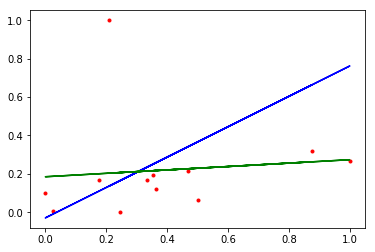

In [106]:
plt.plot(x_train,y_train,"r.",
         x_train,hypothesis(a,x_train,b),"b",
         x_train,hypothesis(final_a,x_train,final_b),"g")

In [107]:
plt.show()

In [108]:
final_a,final_b

(0.088692981053783, 0.1848243040641681)

In [109]:
x_test[:3]


array([0.34878171, 0.4596512 , 0.24540672])

In [110]:
y_test[:3]

array([0.1566445 , 0.72922945, 0.21259101])

In [111]:
hypothesis(final_a,x_test[:3],final_b)

array([0.21575879, 0.22559214, 0.20659016])

In [112]:
np.sqrt(error(final_a,x_test,final_b,y_test))

0.23339723735725845

In [113]:
Z=np.array(z)

In [114]:
Y=np.array(y)
z_train,z_test,y_train,y_test=train_test_split(Z,Y,test_size=0.2)
z_train.size

12

In [115]:
z_test.size

4

In [116]:
a=-0.7038928123368362
b=0.6038709907032682
learning_rate=0.01
iterations=10000

In [117]:
final_a,final_b=descend(a,z_train,b,y_train,learning_rate,iterations)

Error:0.3354633893341727,a:-0.7038928123368362,b:0.6038709907032682
Error:0.19810967741783653,a:0.0672687969999893,b:0.320514454868891
Error:0.13782487462563917,a:0.4651970367901081,b:0.12520566458933777
Error:0.11417460982800562,a:0.6810664699013057,b:0.019253677105227417
Error:0.10621640874608321,a:0.798172085467948,b:-0.03822353278144875
Error:0.10375822061377671,a:0.8616999550678278,b:-0.0694039734202474
Error:0.1030236346020732,a:0.8961627790440433,b:-0.086318849426695
Error:0.10280645483687006,a:0.9148582940030042,b:-0.0954948913443789
Error:0.10274245392127018,a:0.9250003032539585,b:-0.10047274310297355
Error:0.10272361160026236,a:0.9305021763969124,b:-0.10317314577689539


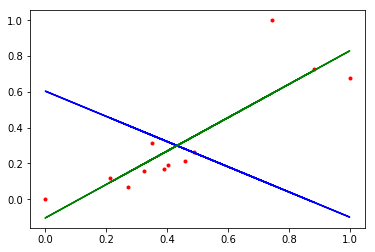

In [118]:
plt.plot(z_train,y_train,"r.",
         z_train,hypothesis(a,z_train,b),"b",
         z_train,hypothesis(final_a,z_train,final_b),"g")

In [119]:
plt.show()

In [120]:
z_test[:3]

array([0.30168726, 0.38800719, 0.0075659 ])

In [121]:
y_test[:3]

array([0.10023103, 0.16598725, 0.00821598])

In [122]:
hypothesis(final_a,z_test[:3],final_b)

array([ 0.17698302,  0.25756154, -0.0975754 ])

In [123]:
np.sqrt(error(final_a,z_test,final_b,y_test))

0.07330612692982676